In [1]:
import perceval as pcvl
import numpy as np
import itertools
from Simulation import create_inputs, calculate_proba
from Functions import Gaussian, Schmidt, Exponential, Lowdin, Lrz, modified_Schmidt
import matplotlib.pyplot as plt
import scipy as sc


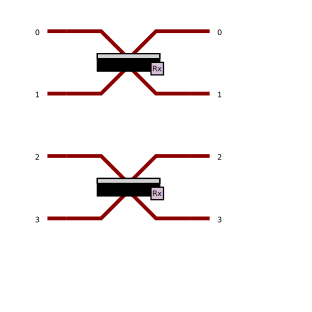

In [2]:
## Create the circuit

n = 2 #Nombre de modes spatiaux
m = 2 #Nombre de modes internes
k = 2 #Nombre de photon
circuit = pcvl.Circuit(n*m)
circuit.add((0,1), pcvl.BS())
circuit.add((2,3),pcvl.BS())

pcvl.pdisplay(circuit)

In [5]:
## Getting the c vector 
env_type = 1  # 1=Gaussian, 2=exponential
N = 100  # number of x points to plot the wave functions
N_shift = 2  # total number of shifted wave functions
waves = np.zeros((N_shift, N))  # values for each wave function

sigma_wave = 0.5  # standard deviation of wave function
x = np.linspace(-16 * sigma_wave, 16 * sigma_wave, N)  # position values

shift_list=np.linspace(-8*sigma_wave,8*sigma_wave,100)
C2S=np.zeros(len(shift_list))
C2MGS = np.zeros_like(C2S)
CL11 = np.zeros_like(C2S)
CL12 = np.zeros_like(C2S)
CL21 = np.zeros_like(C2S)
CL22 = np.zeros_like(C2S)
for k in range(len(shift_list)):
    shift=shift_list[k]
    x_shift=np.array([0,shift])
    for i in range(N_shift):
        waves[i] = Gaussian(x-x_shift[i], sigma_wave)

    new_base,coeffsS=Schmidt(waves,x)
    new_base,coeffsL = Lowdin(waves,x)
    new_base,coeffsMGS = modified_Schmidt(waves,x)
    C2MGS[k] = coeffsMGS[1,1]
    C2S[k]=coeffsS[1,1]
    CL11[k] = coeffsL[0,0]
    CL12[k] = coeffsL[0,1]
    CL21[k] = coeffsL[1,0]
    CL22[k] = coeffsL[1,1]


In [7]:
print(C2MGS)

[0.99999994 0.99999989 0.9999998  0.99999963 0.99999933 0.99999879
 0.99999785 0.99999623 0.99999347 0.99998885 0.9999812  0.99996871
 0.9999486  0.99991666 0.99986664 0.99978935 0.99967158 0.99949459
 0.99923229 0.99884892 0.99829635 0.99751094 0.99641007 0.9948884
 0.99281418 0.99002574 0.98632862 0.98149355 0.97525583 0.96731634
 0.95734457 0.9449838  0.92985864 0.91158471 0.88978035 0.86407999
 0.83414859 0.79969662 0.76049483 0.71638815 0.66730793 0.61328183
 0.55444091 0.49102318 0.42337358 0.35194001 0.27726543 0.1999764
 0.12076826 0.04038756 0.04038756 0.12076826 0.1999764  0.27726543
 0.35194001 0.42337358 0.49102318 0.55444091 0.61328183 0.66730793
 0.71638815 0.76049483 0.79969662 0.83414859 0.86407999 0.88978035
 0.91158471 0.92985864 0.9449838  0.95734457 0.96731634 0.97525583
 0.98149355 0.98632862 0.99002574 0.99281418 0.9948884  0.99641007
 0.99751094 0.99829635 0.99884892 0.99923229 0.99949459 0.99967158
 0.99978935 0.99986664 0.99991666 0.9999486  0.99996871 0.999981

In [8]:
## Create the inputs and simulation for Schmidt
ProbS = []
for coef in C2S:
    InputsBS = create_inputs(2,2,2,[1,0],[np.sqrt(1-coef ** 2),coef])

    
    #Get backend and simulation
    backend = pcvl.BackendFactory.get_backend("Naive")

    simulator = backend(circuit)
    Sol = simulator.allstateprob_iterator(InputsBS)

    ProbS.append(calculate_proba(n,m,[1,1],Sol))
    

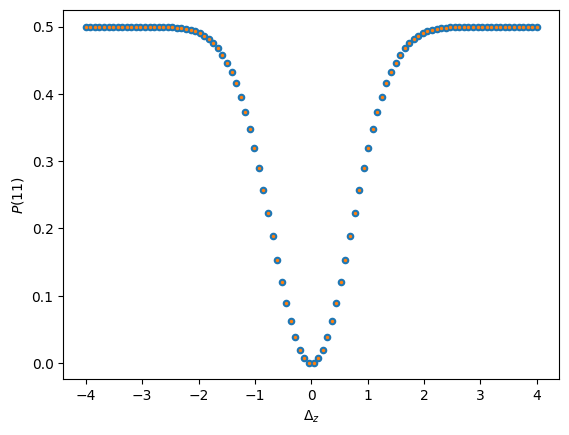

In [9]:
## Plot the results for schmidt
plt.figure()
plt.scatter(shift_list,C2S**2/2,20,label = 'Analytic')
plt.scatter(shift_list,ProbS,2,label = 'Simulation')
plt.xlabel(r'$\Delta_z$')
plt.ylabel(r'$P(11)$')
plt.show()


In [ ]:
## Create the inputs and simulation for Lowdin
ProbL = []
for i in range(len(CL11)):
    InputsBS = create_inputs(2,2,2,[CL11[i],CL12[i]],[CL21[i],CL22[i]])

    
    #Get backend and simulation
    backend = pcvl.BackendFactory.get_backend("Naive")

    simulator = backend(circuit)
    Sol = simulator.allstateprob_iterator(InputsBS)

    ProbL.append(calculate_proba(n,m,[1,1],Sol))
    

In [ ]:
## Plot the results for Lowdin
plt.figure()
plt.scatter(shift_list,(CL11*CL22-CL12*CL21)**2/2,20,label = 'Analytic')
plt.scatter(shift_list,ProbL,2,label = 'Simulation')
plt.xlabel(r'$\Delta_z$')
plt.ylabel(r'$P(11)$')
plt.show()


In [ ]:
import scipy as sc

#Lorentzian amplitude function :
## Analytique dip

N=2000
env_type = 2 # 1 = Gaussian, 2 = exponential (envelope in space)


if env_type == 1 :
    #Gaussian Parameters
    dz = 1e-8 #standard deviation in z
    lam = 500*1e-9 #wave length
    k0 = 2*np.pi/lam #mean k vector
    dk=1/(2*dz) #standard deviation in k 
    z = np.linspace(-13*dz, 13*dz,N)
    k = np.linspace(k0-13*dk, k0+13*dk, N)
    z0 = np.linspace(-8*dz, 8*dz, 100) # z0 : length of shift between photons
if env_type == 2 :
    #Lorentizian Parameters
    gamma = 0.5 #decaying factor in z
    lam = 500*1e-9 #wave length
    k0 = 2*np.pi/lam #mean k vector
    z = np.linspace(-16/gamma,16/gamma, N)
    k = np.linspace(k0-8*gamma,k0+8*gamma,N)
    z0 = np.linspace(-8/gamma, 8/gamma, 2000) # z0 : length of shift between photons


# Beam splitter transfer matrix
BS=1/np.sqrt(2) * np.array([[1,-1],[1,1]])
A = BS[0,0]; B = BS[0,1]; C = BS[1,0]; D = BS[1,1]



dip = np.zeros(len(z0))
for i in range(len(z0)):
    if env_type == 1 :
        env1 = Gaussian(z,dz)
        env2 = Gaussian(z,dz)
        env1_k = Gaussian(k,dk)
        env2_k = np.exp(1j*k*z0[i])*env1_k
    if env_type == 2 :
        env1 = Exponential(z,gamma)
        env2 = Exponential(z,gamma)
        env1_k = Lrz(gamma,k0,k)
        env2_k = np.exp(1j*k*z0[i])*env1_k
        
    overlap = abs(sc.integrate.simps(env1_k*np.conj(env2_k),k))**2
    Pr11 = abs(A)**2*abs(D)**2 + abs(B)**2*abs(C)**2 + 2*np.real(np.conj(A)*np.conj(D)*B*C)*overlap 
    dip[i] = Pr11
    
plt.figure()
plt.plot(z0,dip)
plt.xlabel(r"$z_0$")
plt.ylabel(r"$P(|11\rangle)$")
plt.title("HOM dip")


In [ ]:
plt.figure()
plt.scatter(x,dip,20, label = 'Analytic')
plt.scatter(x,ProbS,2,label = 'Simulation')
plt.xlabel(r"$z_0$")
plt.ylabel(r"$P(|11\rangle)$")
plt.legend()
plt.title("HOM dip")

Test exponentielle

In [ ]:
env_type = 2  # 1=Gaussian, 2=exponential
N = 501  # number of x points to plot the wave functions
N_shift = 2  # total number of shifted wave functions
waves = np.zeros((N_shift, N))  # values for each wave function

gamma=0.5
sigma_wave = 2  # standard deviation of wave function
#x = np.linspace(-16 * sigma_wave, 16 * sigma_wave, N)  # position values
x = np.linspace(-16 / gamma, 16 /gamma, N)
#shift_list=np.linspace(-8*sigma_wave,8*sigma_wave,500)
shift_list=np.linspace(-8/gamma,8/gamma,N)

C2S = np.zeros(len(shift_list))
CL11 = np.zeros_like(C2S)
CL12 = np.zeros_like(C2S)
CL21 = np.zeros_like(C2S)
CL22 = np.zeros_like(C2S)
for k in range(len(shift_list)):
    shift=shift_list[k]
    x_shift=np.array([0,shift])
    for i in range(N_shift):
        #waves[i] = Gaussian(x-x_shift[i], sigma_wave)
        waves[i] = Exponential(x-x_shift[i], gamma)

    new_base,coeffsL=Lowdin(waves,x)

    CL11[k] = coeffsL[0,0]
    CL12[k] = coeffsL[0,1]
    CL21[k] = coeffsL[1,0]
    CL22[k] = coeffsL[1,1]

    

In [ ]:
## Create the inputs and simulation for Lowdin
ProbL = []
for i in range(len(CL11)):
    InputsBS = create_inputs(2,2,2,[CL11[i],CL12[i]],[CL21[i],CL22[i]])

    
    #Get backend and simulation
    backend = pcvl.BackendFactory.get_backend("Naive")

    simulator = backend(circuit)
    Sol = simulator.allstateprob_iterator(InputsBS)

    ProbL.append(calculate_proba(n,m,[1,1],Sol))

In [ ]:
#Comparison with analytical HOM dip

#lam = 0.5*sigma_wave #wave length
lam = 0.5/gamma
k0 = 2*np.pi/lam
#dk=1/(2*sigma_wave) #standard deviation in k 
#k = np.linspace(k0-13*dk, k0+13*dk, N)
k = np.linspace(k0-25*gamma,k0+25*gamma,N)
dip = np.zeros(len(shift_list))

# Beam splitter transfer matrix
BS=1/np.sqrt(2) * np.array([[1,-1],[1,1]])
A = BS[0,0]; B = BS[0,1]; C = BS[1,0]; D = BS[1,1]

for i in range(len(shift_list)):  
    if env_type==1:
        env1 = Gaussian(x,sigma_wave)
        env2 = Gaussian(x-shift_list[i],sigma_wave)
        env1_k = Gaussian(k-k0,dk)
        env2_k = np.exp(1j*k*shift_list[i])*env1_k
    if env_type==2:
        env1 = Exponential(x,gamma)
        env2 = Exponential(x-shift_list[i],gamma)
        env1_k = Lrz(k-k0,gamma)
        env2_k = np.exp(1j*k*shift_list[i])*env1_k
    overlap = abs(sc.integrate.simps(env1_k*np.conj(env2_k),k))**2
    Pr11 = abs(A)**2*abs(D)**2 + abs(B)**2*abs(C)**2 + 2*np.real(np.conj(A)*np.conj(D)*B*C)*overlap 
    dip[i] = Pr11
    

In [ ]:
plt.figure()
plt.scatter(x/1e9,dip,20, label = 'Analytic')
plt.scatter(x/1e9,ProbL,2,label = 'Simulation')
plt.xlabel(r"$\Delta z$")
plt.ylabel(r"$P(|11\rangle)$")
plt.legend()


In [ ]:

print(ProbS)